In [28]:
from tensorflow.keras.models import load_model
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



EID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/NNs/electronID_w_track_95"
MID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/NNs/muonID_w_track_99"
PPID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/NNs/pi+_ID_w_track_86"
PMID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/NNs/pi-_ID_w_track_81"
PHID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/NNs/photon_ID_w_track_89"

filenames = ['/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi+_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_electron_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi-_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_klong_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi0_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_muon_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_positron_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_photon_0_10000.csv']

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.6f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ovo ROC of ePN1_vs_photon0')
    plt.legend(loc="lower right")
    plt.show()

In [29]:
mu1_vs_ePN0 = ['/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_electron_0_10000.csv',
              '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_muon_1_10000.csv',
              '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_positron_0_10000.csv']

mu1_vs_piPN0 =['/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi+_0_10000.csv',
              '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_muon_1_10000.csv',
              '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi-_0_10000.csv']

ePN1_vs_piPN0 =['/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi+_0_10000.csv',
               '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_electron_1_10000.csv',
               '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_positron_1_10000.csv',
               '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi-_0_10000.csv']

ePN1_vs_mu0 =['/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_electron_1_10000.csv',
             '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_muon_0_10000.csv',
             '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_positron_1_10000.csv']

ePN1_vs_photon0 =['/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_electron_1_10000.csv',
                  '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_positron_1_10000.csv',
                  '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_photon_0_10000.csv'
                  
]



headers = ["Label", "wid_x", "wid_y", "wew_x", "wew_y", "seed_x", "seed_y",
               "trkl_x", "trkl_y", "trkl_z", "trkl_px", "trkl_py", "trkl_pz", "E/p",
               "h4_41", "h4_42", "h4_43", "h4_44", "h4_45", "h4_46", "gpz"]

# Initialize an empty DataFrame to store concatenated data
all_data = pd.DataFrame(columns=headers)

# Loop through each filename
for filename in ePN1_vs_photon0:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename, names=headers) # if headers are not present in the file, otherwise remove names=...
    # Concatenate vertically
    all_data = pd.concat([all_data, df[1:]], axis=0, ignore_index=True)

# Optionally: save the concatenated data to a new CSV file
all_data.to_csv('ePN1_vs_photon0.csv', index=False)

984/984 [==============================] - 0s 308us/step


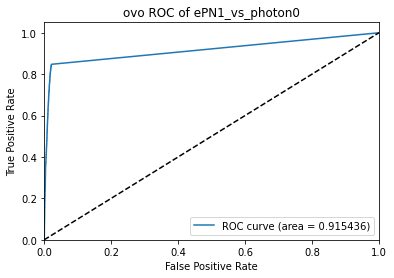

In [30]:
loaded_model = load_model(EID)
df = pd.read_csv('ePN1_vs_photon0.csv')
train_data = df[["wid_x", "wid_y", "wew_x", "wew_y", "seed_x", "seed_y",
   "trkl_x", "trkl_y", "trkl_z", "trkl_px", "trkl_py", "trkl_pz","E/p",
   "h4_41", "h4_42", "h4_43", "h4_44", "h4_45", "h4_46"]].values
y=df['Label'].values
predictions = loaded_model.predict(train_data)
plot_roc(predictions, y)